In [1]:
import pickle
import pandas as pd
import numpy as np
from scipy.stats import moment


In [2]:
%matplotlib inline

In [3]:
# Load final_data_list
with open('./Data/final_data_list.pkl', 'rb') as f:
    final_data_list = pickle.load(f)

# Import Conditions.xlsx into a DataFrame
excel_path = './Conditions.xlsx'
try:
    df_conditions = pd.read_excel(excel_path)
except Exception as e:
    print(f"An error occurred: {e}")

In [4]:
df_conditions

,Condition,Power,Speed,Norm Enthalpy,Hatch Spacing
0,1,100,350,43.23,60.20
1,2,100,500,36.17,51.60
2,3,100,800,28.59,41.50
3,4,100,1250,22.87,33.70
4,5,120,500,43.40,56.90
5,6,120,800,34.31,45.90
6,7,120,1100,29.26,39.54
7,8,120,1250,27.45,37.14
8,9,120,1400,25.94,35.14
9,10,160,500,57.87,66.77


In [5]:
def get_condition_info(condition_number, df_conditions):
    """
    Retrieve information for a specific condition number from the DataFrame.

    Parameters:
    - condition_number: int, the condition number
    - df_conditions: pandas DataFrame, the DataFrame containing condition information

    Returns:
    - info_dict: Dictionary containing information for the specified condition
    """
    # Filter the DataFrame to get the row corresponding to the condition number
    condition_row = df_conditions[df_conditions['Condition'] == condition_number]

    # Convert the row to a dictionary
    info_dict = condition_row.iloc[0].to_dict()

    return info_dict

# Example usage:
condition_number = 1
condition_info = get_condition_info(condition_number, df_conditions)
print(f"Information for condition {condition_number}: {condition_info}")


Information for condition 1: {'Condition': 1.0, 'Power': 100.0, 'Speed': 350.0, 'Norm Enthalpy': 43.23, 'Hatch Spacing': 60.2}


In [6]:
# Initialize an empty dictionary to store the moments for each condition
moments_dict = {}

# Loop over all conditions
for condition_number in range(len(final_data_list)):
    # Get information for the current condition (adding 1 to the condition number)
    condition_info = get_condition_info(condition_number + 1, df_conditions)

    # Extract the data for the current condition
    condition_data = final_data_list[condition_number]

    # Initialize a dictionary to hold the moments for this condition
    condition_moments = {'info': condition_info, 'channel_0': {}, 'channel_1': {}}

    # Compute the first 5 statistical moments for each channel
    for channel in range(2):
        # Flatten the array for the current channel to compute moments
        flat_data = condition_data[channel].flatten()

        # Compute the first 5 moments: mean, variance, skewness, kurtosis, 5th moment
        moments = [np.mean(flat_data), np.var(flat_data)]
        moments.extend([moment(flat_data, moment=i) for i in range(3, 6)])

        # Add the moments to the dictionary
        channel_key = f'channel_{channel}'
        condition_moments[channel_key]['moments'] = moments

    # Add this condition's moments to the main dictionary
    moments_dict[condition_number + 1] = condition_moments

In [7]:
moments_dict

{1: {'info': {'Condition': 1.0,
   'Power': 100.0,
   'Speed': 350.0,
   'Norm Enthalpy': 43.23,
   'Hatch Spacing': 60.2},
  'channel_0': {'moments': [0.19108423098485927,
    0.0023506149898798873,
    0.00015415668695260907,
    4.656852444805476e-05,
    5.962538197623926e-06]},
  'channel_1': {'moments': [0.3587240687864268,
    0.024882087704913007,
    0.002523206606503739,
    0.0028469686334505746,
    0.0013650740114244623]}},
 2: {'info': {'Condition': 2.0,
   'Power': 100.0,
   'Speed': 500.0,
   'Norm Enthalpy': 36.17,
   'Hatch Spacing': 51.6},
  'channel_0': {'moments': [0.16721756307969152,
    0.0008157693058079778,
    2.327490374537667e-06,
    4.577314431267189e-06,
    -2.986049559499138e-08]},
  'channel_1': {'moments': [0.386022552955784,
    0.01837096354846124,
    0.003923312725085395,
    0.005841106283001392,
    0.008936764423023295]}},
 3: {'info': {'Condition': 3.0,
   'Power': 100.0,
   'Speed': 800.0,
   'Norm Enthalpy': 28.59,
   'Hatch Spacing': 41.5}

In [8]:
import numpy as np

# Initialize dictionaries to store mean and std for each channel and moment
means = {0: {}, 1: {}}
stds = {0: {}, 1: {}}

# Calculate the mean and std for each moment and channel
for channel in [0, 1]:
    channel_key = f'channel_{channel}'
    for moment_index in range(5):  # Looping over 5 moments
        moment_values = [moments_dict[cond][channel_key]['moments'][moment_index] for cond in moments_dict.keys()]
        means[channel][moment_index] = np.mean(moment_values)
        stds[channel][moment_index] = np.std(moment_values)

# Perform the standardization
for channel in [0, 1]:
    channel_key = f'channel_{channel}'
    for condition in moments_dict.keys():
        for moment_index in range(5):  # Looping over 5 moments
            x = moments_dict[condition][channel_key]['moments'][moment_index]
            mean = means[channel][moment_index]
            std = stds[channel][moment_index]
            
            moments_dict[condition][channel_key]['moments'][moment_index] = (x - mean) / std


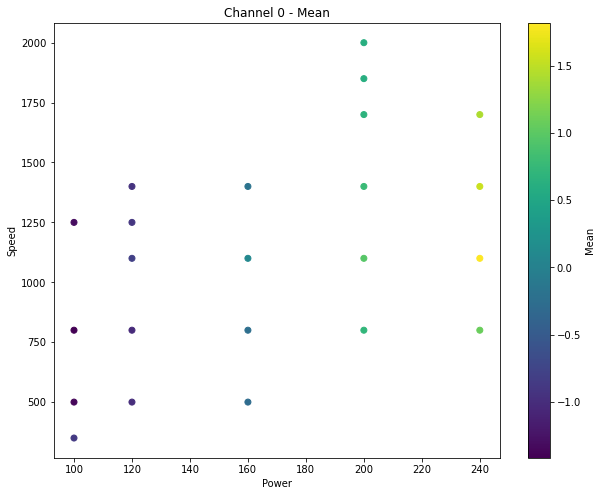

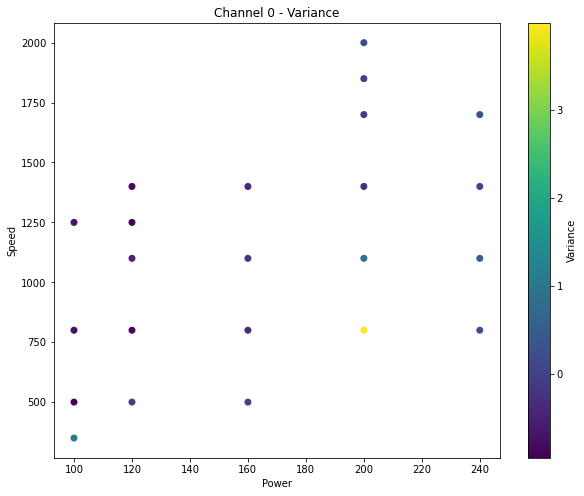

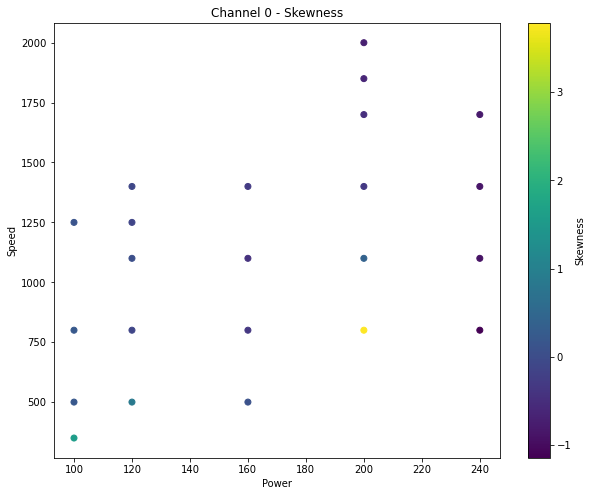

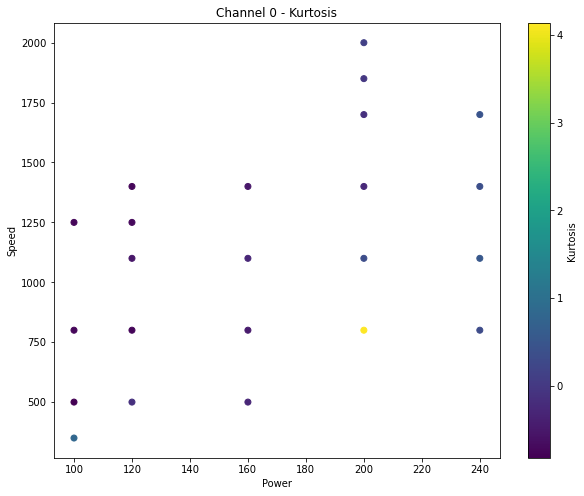

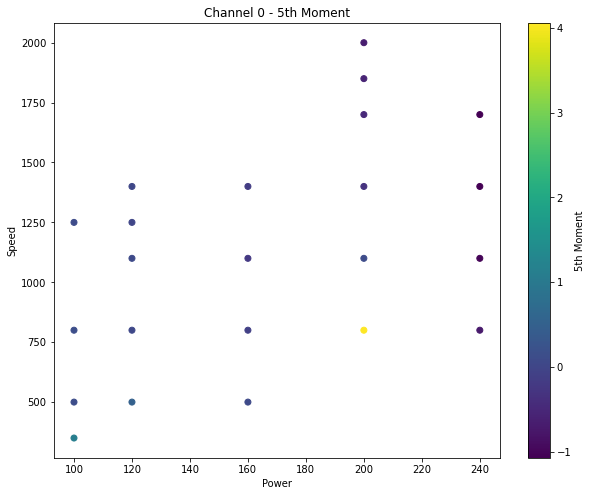

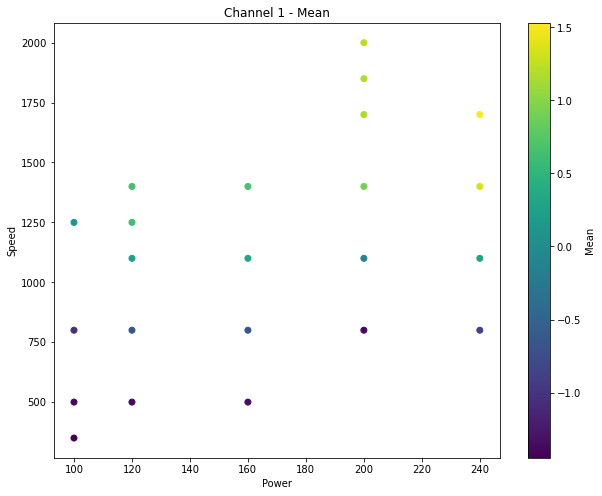

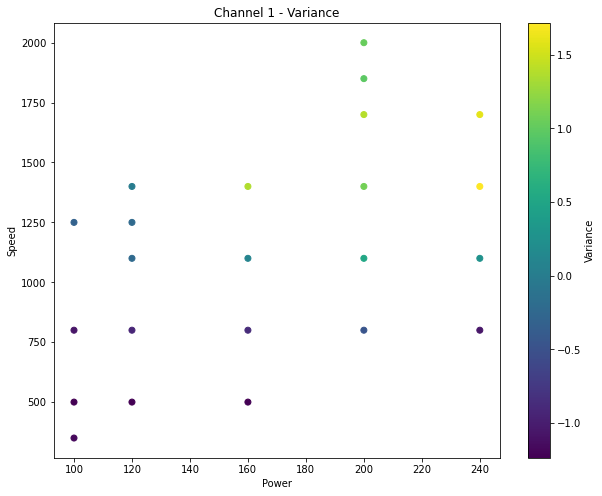

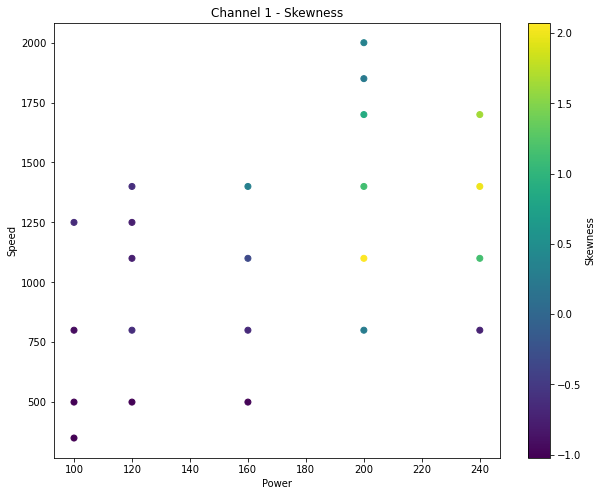

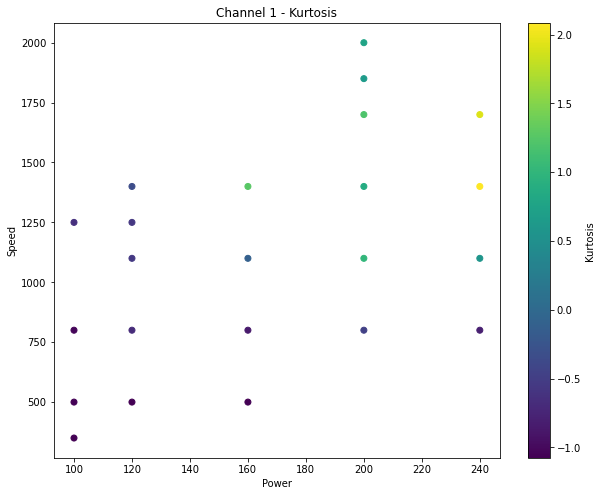

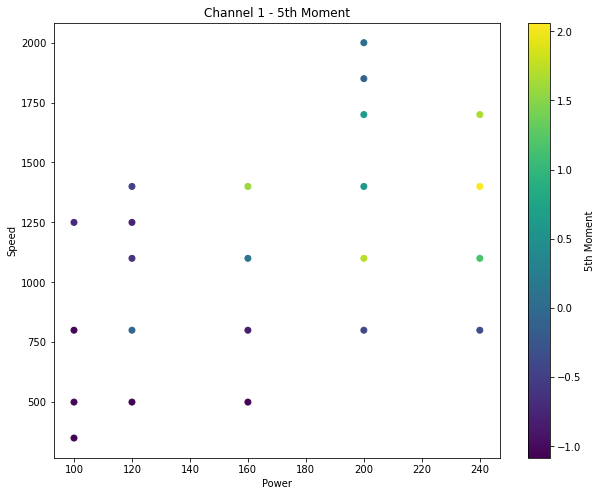

In [9]:
import matplotlib.pyplot as plt

# Initialize the names of the moments for labeling
moment_names = ['Mean', 'Variance', 'Skewness', 'Kurtosis', '5th Moment']

# Loop through each channel
for channel in range(2):
    channel_key = f'channel_{channel}'
    
    # Initialize the data for the scatter plots
    power = []
    speed = []
    moments = [[] for _ in range(5)]
    
    # Gather the data for the scatter plots
    for condition_number, condition_data in moments_dict.items():
        power.append(condition_data['info']['Power'])
        speed.append(condition_data['info']['Speed'])
        
        for i in range(5):
            moments[i].append(condition_data[channel_key]['moments'][i])
            
    # Create the 5 scatter plots for each moment
    for i, moment_name in enumerate(moment_names):
        plt.figure(figsize=(10, 8))
        plt.scatter(power, speed, c=moments[i], cmap='viridis')
        plt.colorbar(label=f'{moment_name}')
        plt.xlabel('Power')
        plt.ylabel('Speed')
        plt.title(f'Channel {channel} - {moment_name}')
        plt.show()


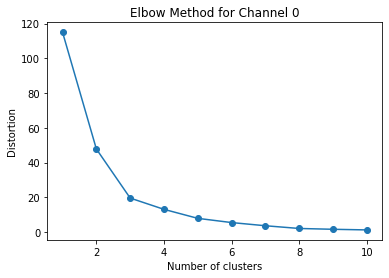

Enter the optimal number of clusters for channel 0: 6


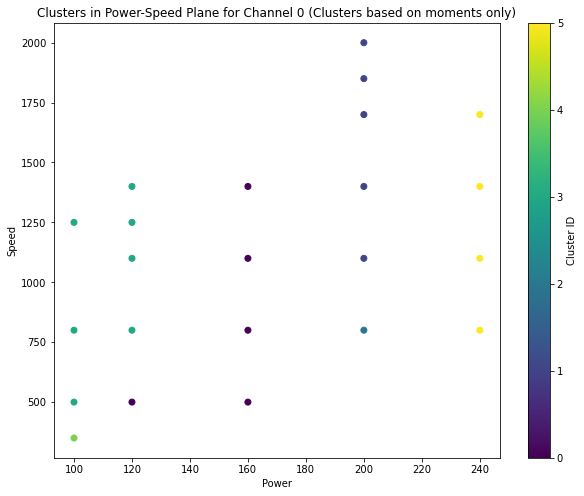

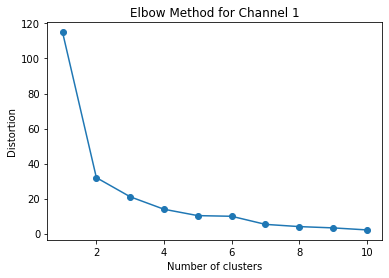

Enter the optimal number of clusters for channel 1: 7


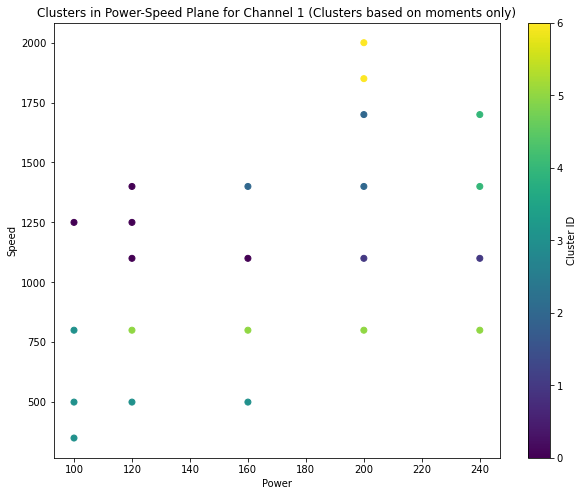

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Loop through each channel
for channel in range(2):
    channel_key = f'channel_{channel}'
    
    # Initialize the data for clustering
    clustering_data = []
    
    # Gather the data for clustering
    for condition_number, condition_data in moments_dict.items():
        moments = condition_data[channel_key]['moments']
        clustering_data.append(moments)

    clustering_data = np.array(clustering_data)
    
    # Step 2: Optimal k Analysis using the Elbow Method
    distortions = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, n_init=2)
        kmeans.fit(clustering_data)
        distortions.append(kmeans.inertia_)

    plt.figure()
    plt.plot(K_range, distortions, marker='o')
    plt.title(f'Elbow Method for Channel {channel}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

    # Choose the optimal k (you can also set this manually after observing the elbow plot)
    optimal_k = int(input(f"Enter the optimal number of clusters for channel {channel}: "))
    
    # Step 3: Final Clustering
    kmeans = KMeans(n_clusters=optimal_k, n_init=2)
    kmeans.fit(clustering_data)
    labels = kmeans.labels_

    # Step 4: Plotting the clusters in the power-speed plane, color-coded by cluster ID
    power = [condition_data['info']['Power'] for condition_data in moments_dict.values()]
    speed = [condition_data['info']['Speed'] for condition_data in moments_dict.values()]

    plt.figure(figsize=(10, 8))
    plt.scatter(power, speed, c=labels, cmap='viridis')
    plt.colorbar(label='Cluster ID')
    plt.xlabel('Power')
    plt.ylabel('Speed')
    plt.title(f'Clusters in Power-Speed Plane for Channel {channel} (Clusters based on moments only)')
    plt.show()


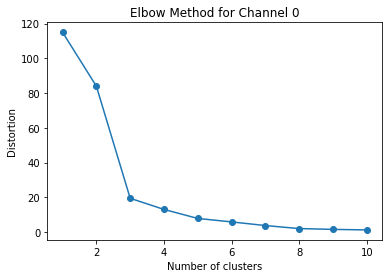

Enter the optimal number of clusters for channel 0: 6


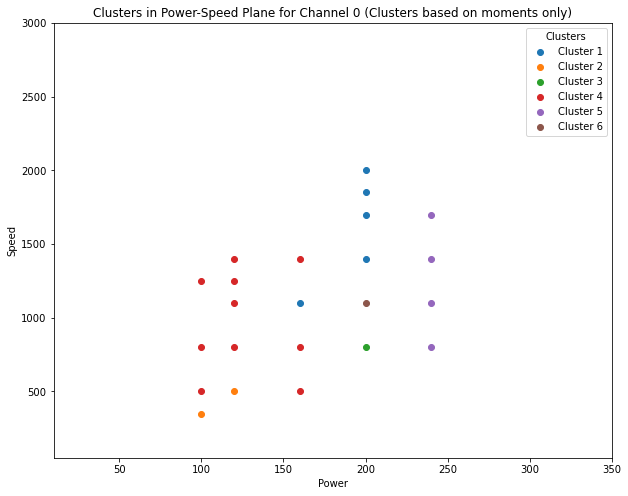

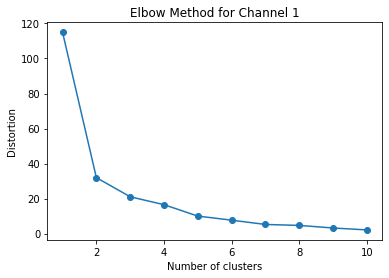

Enter the optimal number of clusters for channel 1: 6


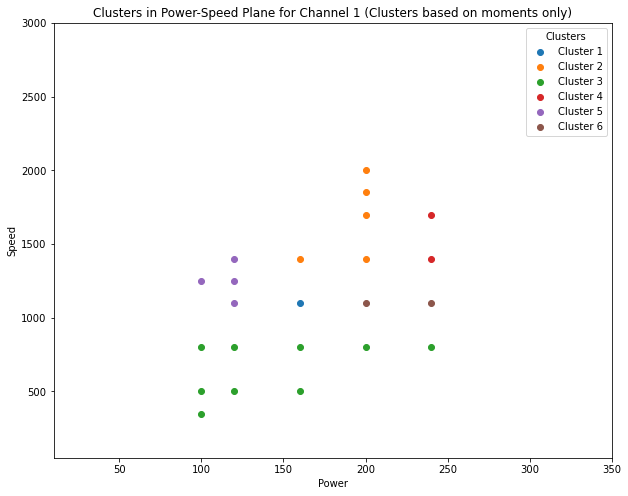

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Loop through each channel
for channel in range(2):
    channel_key = f'channel_{channel}'
    
    # Initialize the data for clustering
    clustering_data = []
    
    # Gather the data for clustering
    for condition_number, condition_data in moments_dict.items():
        moments = condition_data[channel_key]['moments']
        clustering_data.append(moments)

    clustering_data = np.array(clustering_data)
    
    # Step 2: Optimal k Analysis using the Elbow Method
    distortions = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k, n_init=2)
        kmeans.fit(clustering_data)
        distortions.append(kmeans.inertia_)

    plt.figure()
    plt.plot(K_range, distortions, marker='o')
    plt.title(f'Elbow Method for Channel {channel}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

    # Choose the optimal k (you can also set this manually after observing the elbow plot)
    optimal_k = int(input(f"Enter the optimal number of clusters for channel {channel}: "))
    
    # Step 3: Final Clustering
    kmeans = KMeans(n_clusters=optimal_k, n_init=2)
    kmeans.fit(clustering_data)
    labels = kmeans.labels_

    # Step 4: Plotting the clusters in the power-speed plane, labeled by cluster ID
    power = [condition_data['info']['Power'] for condition_data in moments_dict.values()]
    speed = [condition_data['info']['Speed'] for condition_data in moments_dict.values()]

    plt.figure(figsize=(10, 8))

    # Create a scatter plot for each cluster and add a legend entry for it
    unique_labels = np.unique(labels)
    for label in unique_labels:
        idx = np.where(labels == label)
        plt.scatter(np.array(power)[idx], np.array(speed)[idx], label=f'Cluster {label + 1}')

    plt.xlabel('Power')
    plt.ylabel('Speed')

    # Set the x and y-axis limits
    plt.xlim(10, 350)
    plt.ylim(50, 3000)

    plt.title(f'Clusters in Power-Speed Plane for Channel {channel} (Clusters based on moments only)')
    plt.legend(title='Clusters')

    plt.show()


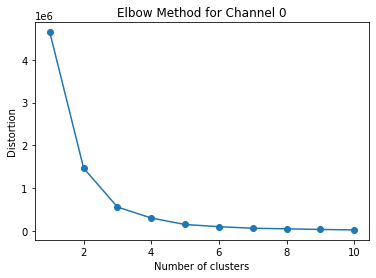

Enter the optimal number of clusters for channel 0: 3


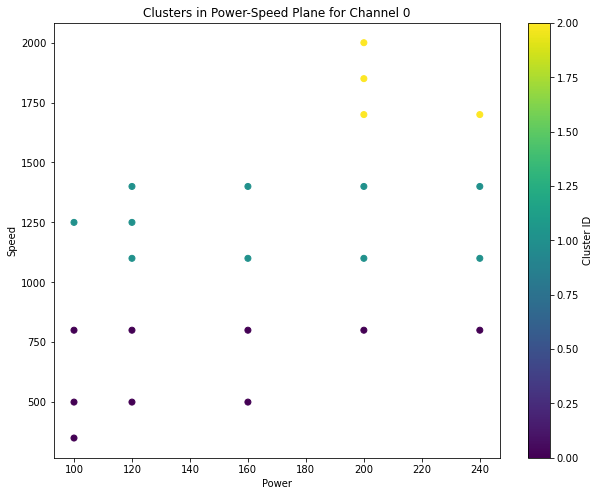

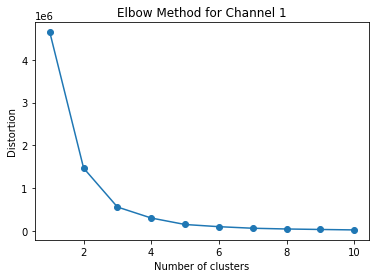

Enter the optimal number of clusters for channel 1: 3


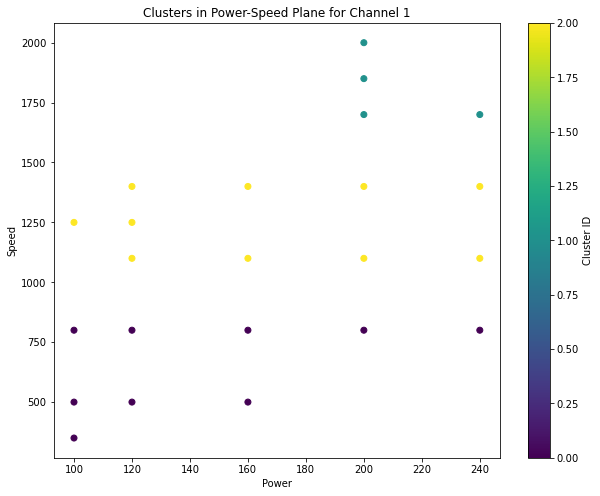

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Loop through each channel
for channel in range(2):
    channel_key = f'channel_{channel}'
    
    # Initialize the data for clustering
    clustering_data = []
    
    # Gather the data for clustering
    for condition_number, condition_data in moments_dict.items():
        power = condition_data['info']['Power']
        speed = condition_data['info']['Speed']
        moments = condition_data[channel_key]['moments']
        clustering_data.append([power, speed] + moments)

    clustering_data = np.array(clustering_data)
    
    # Step 2: Optimal k Analysis using the Elbow Method
    distortions = []
    K_range = range(1, 11)
    for k in K_range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(clustering_data)
        distortions.append(kmeans.inertia_)

    plt.figure()
    plt.plot(K_range, distortions, marker='o')
    plt.title(f'Elbow Method for Channel {channel}')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

    # Choose the optimal k (you can also set this manually after observing the elbow plot)
    optimal_k = int(input(f"Enter the optimal number of clusters for channel {channel}: "))
    
    # Step 3: Final Clustering and Plotting
    kmeans = KMeans(n_clusters=optimal_k)
    kmeans.fit(clustering_data)
    labels = kmeans.labels_

    plt.figure(figsize=(10, 8))
    plt.scatter(clustering_data[:, 0], clustering_data[:, 1], c=labels, cmap='viridis')
    plt.colorbar(label='Cluster ID')
    plt.xlabel('Power')
    plt.ylabel('Speed')
    plt.title(f'Clusters in Power-Speed Plane for Channel {channel}')
    plt.show()


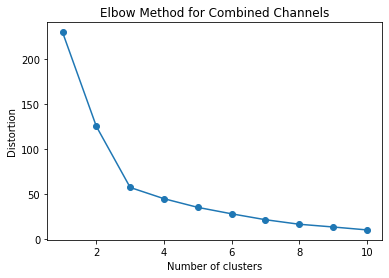

Enter the optimal number of clusters for combined channels: 2


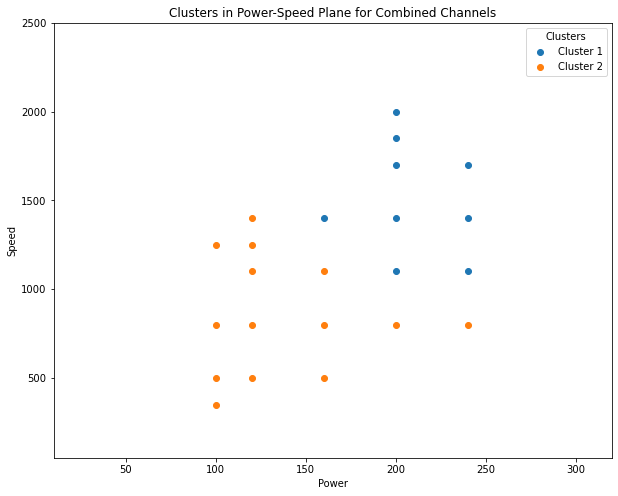

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Initialize the data for clustering
clustering_data = []

# Gather the data for clustering
for condition_number, condition_data in moments_dict.items():
    moments_channel_0 = condition_data['channel_0']['moments']
    moments_channel_1 = condition_data['channel_1']['moments']
    combined_moments = moments_channel_0 + moments_channel_1  # Concatenating moments from both channels
    clustering_data.append(combined_moments)

clustering_data = np.array(clustering_data)

# Step 2: Optimal k Analysis using the Elbow Method
distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(clustering_data)
    distortions.append(kmeans.inertia_)

plt.figure()
plt.plot(K_range, distortions, marker='o')
plt.title('Elbow Method for Combined Channels')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# Choose the optimal k (you can also set this manually after observing the elbow plot)
optimal_k = int(input("Enter the optimal number of clusters for combined channels: "))

# Step 3: Final Clustering
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(clustering_data)
labels = kmeans.labels_

# Step 4: Plotting the clusters in the power-speed plane, labeled by cluster ID
power = [condition_data['info']['Power'] for condition_data in moments_dict.values()]
speed = [condition_data['info']['Speed'] for condition_data in moments_dict.values()]

plt.figure(figsize=(10, 8))

# Create a scatter plot for each cluster and add a legend entry for it
unique_labels = np.unique(labels)
for label in unique_labels:
    idx = np.where(labels == label)
    plt.scatter(np.array(power)[idx], np.array(speed)[idx], label=f'Cluster {label + 1}')

plt.xlabel('Power')
plt.ylabel('Speed')

# Set the x and y-axis limits
plt.xlim(10, 320)
plt.ylim(50, 2500)

plt.title('Clusters in Power-Speed Plane for Combined Channels')
plt.legend(title='Clusters')

plt.show()
